# Data Analysis and visualization Python jobs on Indeed

In [1]:
%matplotlib inline

In [2]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("jobs_cleaning.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      304 non-null    int64  
 1   title           304 non-null    object 
 2   company         304 non-null    object 
 3   location        304 non-null    object 
 4   minimum salary  304 non-null    object 
 5   rating          148 non-null    float64
 6   urgent hiring   25 non-null     float64
 7   link            304 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 19.1+ KB


In [23]:
df.sample(20)

,Unnamed: 0,title,company,location,minimum salary,rating,urgent hiring,link
249,265,"Editorial Production Associate, The New Yorker",Conde Nast,"New York, NY",0.0,4.0,NaN,https://www.indeed.com/viewjob?jk=3ecb7c1d250a...
210,224,Site Reliability Engineer - Python and Automat...,Saragossa,"New York, NY",0.0,NaN,NaN,https://www.indeed.com/viewjob?jk=2278f745eaf9...
258,275,Bioinformatics Programmer,NYU Langone Health,"New York, NY",0.0,4.1,NaN,https://www.indeed.com/viewjob?jk=8434bc915c82...
147,156,Junior Laboratory Associate,New York University,"New York, NY",40000.0,4.2,NaN,https://www.indeed.com/viewjob?jk=f5be0253521b...
43,45,Junior Laboratory Associate,New York University,"New York, NY",40000.0,4.2,NaN,https://www.indeed.com/viewjob?jk=f5be0253521b...
235,250,"Editorial Production Associate, The New Yorker",Conde Nast,"New York, NY",0.0,4.0,NaN,https://www.indeed.com/viewjob?jk=3ecb7c1d250a...
137,146,Entry Level Python Developer / Jr. Python Deve...,KesarWeb,"New York, NY",65000.0,NaN,NaN,https://www.indeed.com/viewjob?jk=52e375af8715...
204,217,Junior Laboratory Associate,New York University,"New York, NY",40000.0,4.2,NaN,https://www.indeed.com/viewjob?jk=f5be0253521b...
39,41,IT Internship,NPower,"New York, NY",30000.0,3.5,NaN,https://www.indeed.com/viewjob?jk=fae3bf7adc86...
232,247,Data Technician (Full- or Part-Time),Thasos Group,"New York, NY",0.0,NaN,NaN,https://www.indeed.com/viewjob?jk=da727c0cddda...


In [6]:
df.head()

,Unnamed: 0,title,company,location,minimum salary,rating,urgent hiring,link
0,0,Python Developer,Systemonex INC,"New York, NY",70000.0,NaN,NaN,https://www.indeed.com/viewjob?jk=261a6748688d...
1,1,Machine Vision Engineer,"Intelligent Artifacts, Inc.","New York, NY",80000.0,NaN,NaN,https://www.indeed.com/viewjob?jk=438f8386a490...
2,2,Software Engineer Senior Instructor,MIM,"New York, NY",87000.0,NaN,NaN,https://www.indeed.com/viewjob?jk=f1433de8cb7a...
3,3,"Quantitative Investment Analytics, Sr. Analyst",Global Atlantic Financial Group,"New York, NY",TBD,3.2,NaN,https://www.indeed.com/viewjob?jk=ae577fac66aa...
4,4,Bioinformatics Programmer,NYU Langone Health,"New York, NY",TBD,4.1,NaN,https://www.indeed.com/viewjob?jk=8434bc915c82...


In [7]:
df.shape

(304, 8)

In [8]:
df.describe()

,Unnamed: 0,rating,urgent hiring
count,304.000000,148.000000,25.0
mean,161.279605,3.875000,0.0
std,93.790604,0.330507,0.0
min,0.000000,3.100000,0.0
25%,80.750000,3.650000,0.0
50%,161.500000,4.000000,0.0
75%,242.250000,4.100000,0.0
max,323.000000,4.300000,0.0


In [9]:
df['company'].value_counts()

New York University                    20
SAM Consulting Services, Inc.          20
KesarWeb                               20
Conde Nast                             20
MakerState                             20
NPower                                 20
Systemonex INC                         20
Thasos Group                           20
Intelligent Artifacts, Inc.            20
Morgan Stanley                         20
Peopleforce INC                        20
MIM                                    16
NYU Langone Health                     13
Saragossa                              13
Global Atlantic Financial Group        13
Indeed                                  7
Urner Barry                             5
Pensa Systems                           4
GTS                                     3
Direct Agents                           3
Bloomberg                               3
Biz2Credit Inc                          1
The LCF Group - Last Chance Funding     1
Reddaiah IT Services Inc.         

In [10]:
df['location'].value_counts()

New York, NY          298
Toms River, NJ          5
West Hempstead, NY      1
Name: location, dtype: int64

In [11]:
df['urgent hiring'].value_counts()

0.0    25
Name: urgent hiring, dtype: int64

In [12]:
df['title'].value_counts()

Python Developer                                                           27
Python Hacker - Machine Learning                                           20
Machine Vision Engineer                                                    20
Python Developer with Front end development                                20
Java / Python Tutors                                                       20
Data Technician (Full- or Part-Time)                                       20
Tutor in Python online                                                     20
Editorial Production Associate, The New Yorker                             20
Junior Laboratory Associate                                                20
IT Internship                                                              20
Entry Level Python Developer / Jr. Python Developer                        20
Bioinformatics Programmer                                                  13
Quantitative Investment Analytics, Sr. Analyst                  

In [13]:
df['minimum salary'] = df['minimum salary'].replace("TBD", 0, regex=True)
df['minimum salary'] = df['minimum salary'].astype(float)
df_sal = df.loc[df['minimum salary'] > 70000]
df_sal.sort_values('minimum salary')

,Unnamed: 0,title,company,location,minimum salary,rating,urgent hiring,link
1,1,Machine Vision Engineer,"Intelligent Artifacts, Inc.","New York, NY",80000.0,NaN,NaN,https://www.indeed.com/viewjob?jk=438f8386a490...
286,305,Machine Vision Engineer,"Intelligent Artifacts, Inc.","New York, NY",80000.0,NaN,NaN,https://www.indeed.com/viewjob?jk=438f8386a490...
257,274,Machine Vision Engineer,"Intelligent Artifacts, Inc.","New York, NY",80000.0,NaN,NaN,https://www.indeed.com/viewjob?jk=438f8386a490...
244,260,Machine Vision Engineer,"Intelligent Artifacts, Inc.","New York, NY",80000.0,NaN,NaN,https://www.indeed.com/viewjob?jk=438f8386a490...
241,257,Machine Vision Engineer,"Intelligent Artifacts, Inc.","New York, NY",80000.0,NaN,NaN,https://www.indeed.com/viewjob?jk=438f8386a490...
...,...,...,...,...,...,...,...,...
245,261,Lead Data Strategist,Indeed,"New York, NY",104000.0,4.3,NaN,https://www.indeed.com/viewjob?jk=e3e355bd6f8e...
110,117,Lead Data Strategist,Indeed,"New York, NY",104000.0,4.3,NaN,https://www.indeed.com/viewjob?jk=e3e355bd6f8e...
168,179,Lead Data Strategist,Indeed,"New York, NY",104000.0,4.3,NaN,https://www.indeed.com/viewjob?jk=e3e355bd6f8e...
96,102,Lead Data Strategist,Indeed,"New York, NY",104000.0,4.3,NaN,https://www.indeed.com/viewjob?jk=e3e355bd6f8e...


Text(0.5, 1.0, 'Histrogram of minimum salary')

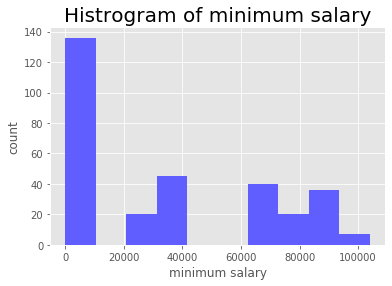

In [14]:
plt.hist(df['minimum salary'], bins=10, color="#615eff")
plt.xlabel('minimum salary')
plt.ylabel('count')
plt.title("Histrogram of minimum salary", fontsize = 20)

Text(0, 0.5, 'minimum salary')

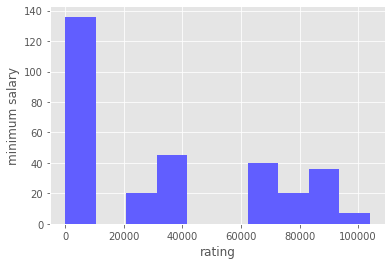

In [15]:
plt.hist(df['minimum salary'], bins=10, color="#615eff")
plt.xlabel("rating")
plt.ylabel('minimum salary')

Text(0, 0.5, 'minimum salary')

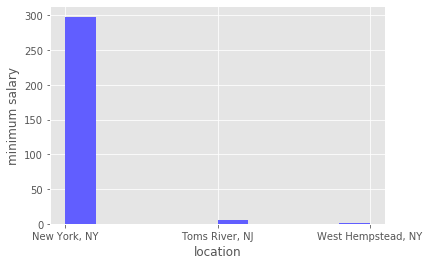

In [16]:
plt.hist(df['location'], bins=10, color="#615eff")
plt.xlabel("location")
plt.ylabel('minimum salary')

Text(0, 0.5, 'count')

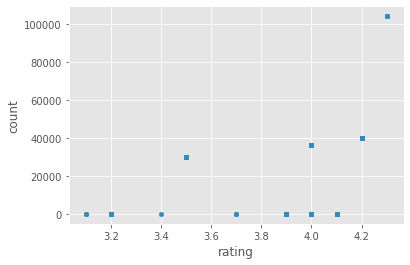

In [17]:
df.plot(kind="scatter", x="rating", y="minimum salary")
plt.xlabel("rating")
plt.ylabel('count')


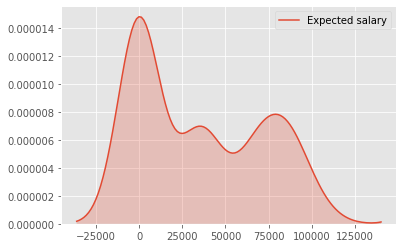

In [18]:
sns.kdeplot(df['minimum salary'], shade=True, label="Expected salary")

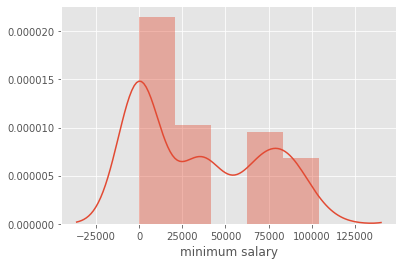

In [19]:
sns.distplot(df['minimum salary'])

In [20]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


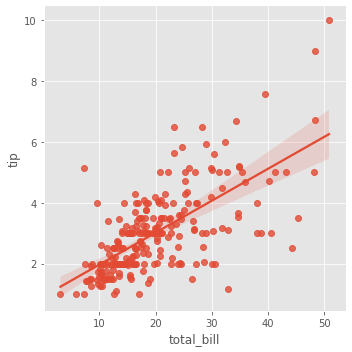

In [21]:
sns.lmplot("total_bill", "tip", tips)